<h1>ARI : adjusted rand index</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# 正しいデータのクラスタリングがわかっているなら、それを使って、クラス分類器のような教師ありモデルを作ればよい、という話は置いておく
# 最も重要な評価指標は、調整ランド指数（ARI）と正規化相互情報量（NRI:normalized mutual information）である
# ARIとNRIはいずれも定量的な指標で最良の場合には１を、関係ないクラスタリングの場合に０を取る（ARIは負の値になりうる）

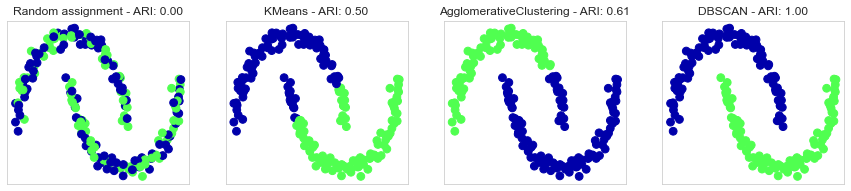

In [3]:
# ARIは直感的に理解しやすい。ランダムクラスタ割り当てはスコア０で、望ましいクラスタリングを完全に再現したDBSCANは１となっている
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize = (15, 3), subplot_kw = {"xticks":(),"yticks":()})
algorithms = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]

random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c = random_clusters, cmap = mglearn.cm3, s = 60)
axes[0].set_title(f"Random assignment - ARI: {adjusted_rand_score(y, random_clusters):.2f}")

for ax, algorithm in zip(axes[1:,], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1], c = clusters, cmap = mglearn.cm3, s = 60)
    ax.set_title(f"{algorithm.__class__.__name__} - ARI: {adjusted_rand_score(y, clusters):.2f}")

In [4]:
# accuracy_scoreを用いると、割り当てられたクラスタラベルが正解データに完全一致していることが要求される
# クラスタラベルには意味はなく、あるクラスタにどのデータポイントが含まれているかだけが重要なため、注意が必要だ
from sklearn.metrics import accuracy_score

clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]
print(f"Accuracy: {accuracy_score(clusters1, clusters2):.2f}")
print(f"ARI: {adjusted_rand_score(clusters1, clusters2):.2f}")

Accuracy: 0.00
ARI: 1.00
